In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_json("../data/CIFAR_editing_results.json")
df["loss_matrix_against_source"] = df["loss_matrix_against_source"].apply(np.array)
df["loss_matrix_against_target"] = df["loss_matrix_against_target"].apply(np.array)
df["top1_matrix_against_source"] = df["top1_matrix_against_source"].apply(np.array)
df["top1_matrix_against_target"] = df["top1_matrix_against_target"].apply(np.array)
# average over `seed`
mean_df = df.groupby(["model", "editing_mode"]).mean().reset_index()
# standard error over `seed`
scalar_df = df.drop(columns=["loss_matrix_against_source", "loss_matrix_against_target", "top1_matrix_against_source", "top1_matrix_against_target"])
stderr_df = scalar_df.groupby(["model", "editing_mode"]).sem().reset_index()

summary_df = pd.merge(mean_df, stderr_df, on=["model", "editing_mode"], suffixes=("_mean", "_stderr"))
row = .iloc[2]

# 10 x 10 matrix of losses source -> target
loss_mat = row["loss_matrix_against_target"]
# 10 x 10 matrix of accuracies source -> target
acc_mat = row["top1_matrix_against_target"]

In [8]:
df

,seed,model,editing_mode,loss,edited_loss_against_source,edited_loss_against_target,loss_matrix_against_source,loss_matrix_against_target,top1,edited_top1_against_source,edited_top1_against_target,top1_matrix_against_source,top1_matrix_against_target,n_test,n_train
0,4,MlpProbe(num_layers=2),linear,1.906250,3.871419,3.102973,"[[1.8671875, 3.140625, 3.078125, 3.7421875, 2....","[[1.8671875, 3.140625, 3.078125, 3.7421875, 2....",0.540039,0.194444,0.303928,"[[0.569679081439971, 0.301731407642364, 0.2409...","[[0.569679081439971, 0.301731407642364, 0.2409...",2048.0,50000.0
1,4,MlpProbe(num_layers=2),quadratic,1.906250,6.305773,1.792643,"[[1.8671875, 1.83203125, 2.140625, 2.390625, 1...","[[1.8671875, 1.83203125, 2.140625, 2.390625, 1...",0.540039,0.048177,0.567112,"[[0.569679081439971, 0.509607255458831, 0.4843...","[[0.569679081439971, 0.509607255458831, 0.4843...",2048.0,50000.0
2,4,MlpProbe(num_layers=6),linear,1.914062,3.894857,3.086046,"[[1.8515625, 3.0625, 3.09375, 3.7265625, 2.812...","[[1.8515625, 3.0625, 3.09375, 3.7265625, 2.812...",0.536133,0.193902,0.307400,"[[0.5842483043670651, 0.296769440174102, 0.264...","[[0.5842483043670651, 0.296769440174102, 0.264...",2048.0,50000.0
3,4,MlpProbe(num_layers=6),quadratic,1.914062,6.272569,1.809570,"[[1.8515625, 1.8203125, 2.1796875, 2.3828125, ...","[[1.8515625, 1.8203125, 2.1796875, 2.3828125, ...",0.536133,0.048774,0.565484,"[[0.5842483043670651, 0.515308260917663, 0.491...","[[0.5842483043670651, 0.515308260917663, 0.491...",2048.0,50000.0
4,4,QuadraticProbe,linear,2.109375,4.297852,2.673828,"[[2.140625, 2.484375, 2.6796875, 3.3515625, 2....","[[2.140625, 2.484375, 2.6796875, 3.3515625, 2....",0.494141,0.141439,0.373372,"[[0.49503800272941506, 0.38027870655059803, 0....","[[0.49503800272941506, 0.38027870655059803, 0....",2048.0,50000.0
5,4,QuadraticProbe,quadratic,2.109375,6.169054,1.785590,"[[2.140625, 1.47265625, 1.8671875, 2.1640625, ...","[[2.140625, 1.47265625, 1.8671875, 2.1640625, ...",0.494141,0.038954,0.591851,"[[0.49503800272941506, 0.708614885807037, 0.61...","[[0.49503800272941506, 0.708614885807037, 0.61...",2048.0,50000.0
6,4,VisionProbe,linear,1.062500,1.987522,7.300130,"[[1.171875, 9.5, 4.484375, 5.953125, 6.59375, ...","[[1.171875, 9.5, 4.484375, 5.953125, 6.59375, ...",0.740723,0.567708,0.092177,"[[0.7541173696517941, 0.046558275818824005, 0....","[[0.7541173696517941, 0.046558275818824005, 0....",2048.0,50000.0
7,4,VisionProbe,quadratic,1.062500,6.568359,2.442329,"[[1.171875, 4.28125, 2.640625, 2.8984375, 3.07...","[[1.171875, 4.28125, 2.640625, 2.8984375, 3.07...",0.740723,0.138238,0.481771,"[[0.7541173696517941, 0.35684120655059803, 0.3...","[[0.7541173696517941, 0.35684120655059803, 0.3...",2048.0,50000.0


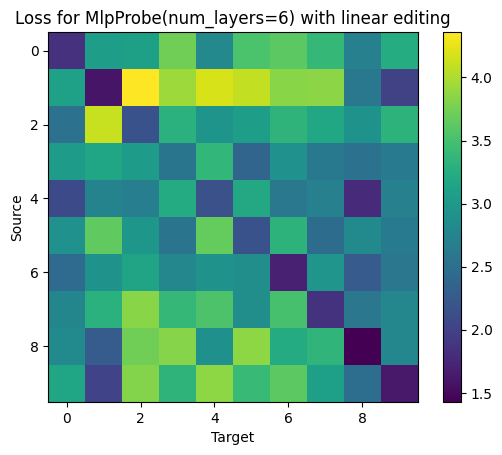

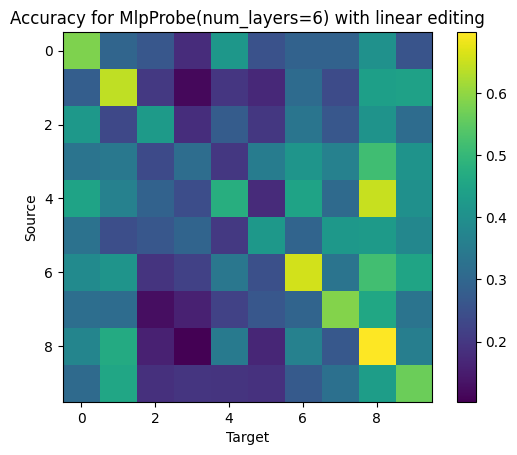

In [7]:

# Plot the loss matrix
plt.imshow(loss_mat)
plt.colorbar()
plt.xlabel("Target")
plt.ylabel("Source")
plt.title(f"Loss for {row['model']} with {row['editing_mode']} editing")

plt.show()

# Plot the accuracy matrix
plt.imshow(acc_mat)
plt.colorbar()
plt.xlabel("Target")
plt.ylabel("Source")
plt.title(f"Accuracy for {row['model']} with {row['editing_mode']} editing")
plt.show()


In [ ]:
# make latex table like the following:
# \begin{tabular}{lcccccc}
#     \toprule
#     \textbf{Model} & \textbf{Unedited Top-1} & \multicolumn{2}{c}{\textbf{Source Top-1}} & \multicolumn{2}{c}{\textbf{Target Top-1}} \\
#     \cmidrule(lr){3-4} \cmidrule(lr){5-6}
#     & & \textbf{Linear} & \textbf{Q-LEACE} & \textbf{Linear} & \textbf{Q-LEACE} \\
#     \midrule
#     MLP (2 layers) & 0.48 & 0.18 & \textbf{0.10} & 0.35 & \textbf{0.49} \\
#     MLP (6 layers) & 0.47 & 0.18 & \textbf{0.10} & 0.35 & \textbf{0.49} \\
#     Quadratic Regression & 0.49 & 0.15 & \textbf{0.09} & 0.41 & \textbf{0.53} \\
#     ResNet-18 & 0.73 & 0.58 & \textbf{0.21} & 0.16 & \textbf{0.49} \\
#     \bottomrule
# \end{tabular}

latex_results =

# Visual comparison to non-least squares quadratic concept editing

In [ ]:
from torchvision.datasets import CIFAR10
from concept_erasure import QuadraticFitter
from concept_editing import get_editor, get_train_test_data
import torch
from torchvision.transforms.functional import to_tensor

download_dir = "/mnt/ssd-1/alexm/cifar10"
data = CIFAR10(root=download_dir, download=True)
images, labels = zip(*data)

In [ ]:
X = torch.stack(list(map(to_tensor, images))) # n x c x w x h

In [ ]:
X_train, X_test, Y_train, Y_test = get_train_test_data(
            total_size=None, test_size=1024, flatten=True
        )
X_train = X_train.double().cpu()
Y_train = Y_train.cpu()
fitter = QuadraticFitter.fit(X_train, Y_train)
optimal_editor = fitter.editor()

In [ ]:
X_bar = X_train.mean(dim=0)
X_ctr = X_train - X_bar
cov_xx = X_ctr.T @ X_ctr / (X_ctr.shape[0] - 1)

In [ ]:
from concept_erasure.optimal_transport import psd_sqrt_rsqrt, psd_sqrt
def quadratic_edit(im: torch.Tensor, source: int, target: int, optimal=False):
    orig_shape = im.shape
    im = im.cpu().double().flatten()
    if optimal:
        return optimal_editor(im.unsqueeze(0), torch.tensor([source]), target).reshape(orig_shape)
    else:
        P = fitter.sigma_xx[source]
        Q = fitter.sigma_xx[target]
        _, inv_sqrt_P = psd_sqrt_rsqrt(P)
        sqrt_Q = psd_sqrt(Q)
        im_ctr = im - fitter.mean_x[source]
        return (sqrt_Q @ inv_sqrt_P @ im_ctr + fitter.mean_x[target]).reshape(orig_shape)
    
def quadratic_erase(im: torch.Tensor, source: int, optimal=False):
    orig_shape = im.shape
    im = im.cpu().double().flatten()
    if optimal:
        return fitter.eraser(im.unsqueeze(0), torch.tensor([source])).reshape(orig_shape)
    else:
        P = fitter.sigma_xx[source]
        Q = cov_xx
        _, inv_sqrt_P = psd_sqrt_rsqrt(P)
        sqrt_Q = psd_sqrt(Q)
        im_ctr = im - fitter.mean_x[source]
        return (sqrt_Q @ inv_sqrt_P @ im_ctr + X_bar).reshape(orig_shape)

In [ ]:
import matplotlib.pyplot as plt
idx = 2
im = X[idx]
source = labels[idx]
plt.imshow(im.numpy().transpose(1, 2, 0))
plt.title(f"Original")
plt.show()

In [ ]:
target = 2
im_edit_suboptimal = quadratic_edit(torch.tensor(im), source, target, optimal=False)
im_edit_optimal = quadratic_edit(torch.tensor(im), source, target, optimal=True)

In [ ]:
plt.imshow(im_edit_suboptimal.numpy().transpose(1, 2, 0))
plt.title("Naive quadratic edited")
plt.show()

plt.title("Q-LEACE edited")
plt.imshow(im_edit_optimal.numpy().transpose(1, 2, 0))
plt.show()

In [ ]:
diff = im_edit_suboptimal - im_edit_optimal
plt.imshow(diff.numpy().transpose(1, 2, 0))
plt.show()

In [ ]:
diff.abs().mean() / im_edit_optimal.abs().mean()

In [ ]:
im_erased_suboptimal = quadratic_erase(torch.tensor(im), source, optimal=False)
im_erased_optimal = quadratic_erase(torch.tensor(im), source, optimal=True)

In [ ]:
plt.imshow(im_erased_suboptimal.numpy().transpose(1, 2, 0))
plt.title("Naive quadratic erased")
plt.show()

plt.imshow(im_erased_optimal.numpy().transpose(1, 2, 0))
plt.title("Q-LEACE erased")
plt.show()

In [ ]:
plt.imshow(im.numpy().transpose(1, 2, 0))

In [ ]:
diff_optimal = im_erased_optimal - im
diff_suboptimal = im_erased_suboptimal - im
print(diff_optimal.norm().mean() / im.norm().mean())
print(diff_suboptimal.norm().mean() / im.norm().mean())

In [ ]:
total_err_optimal = 0
total_err_suboptimal = 0
for idx in range(100):
    im = X[idx]
    source = labels[idx]

    im_erased_suboptimal = quadratic_erase(torch.tensor(im), source, optimal=False)
    im_erased_optimal = quadratic_erase(torch.tensor(im), source, optimal=True)

    diff_optimal = im_erased_optimal - im
    diff_suboptimal = im_erased_suboptimal - im
    err_subopt = diff_suboptimal.abs().mean() / im.abs().mean()
    err_opt = diff_optimal.abs().mean() / im.abs().mean()
    total_err_optimal += err_opt
    total_err_suboptimal += err_subopt

    print(f"Image {idx}:")
    print(f"Average error for optimal: {total_err_optimal / (idx + 1)}")
    print(f"Average error for suboptimal: {total_err_suboptimal / (idx + 1)}")